In [8]:
import pandas as pd
import numpy as np
import math
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
data = pd.read_csv('frDf.csv')

In [17]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 4 columns):
finr     7115 non-null int64
nfinr    7115 non-null int64
fr       7115 non-null int64
df       7115 non-null int64
dtypes: int64(4)
memory usage: 222.5 KB
None


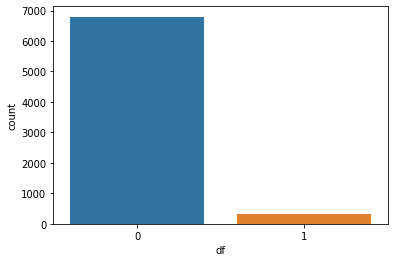

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(x='df', data = data)
plt.show()
plt.savefig('count_plot')

In [10]:
from sklearn.model_selection import train_test_split 
y=data.df
x=data.drop('df',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [19]:
count_no_def = len(data[data['df']==0])
count_def = len(data[data['df']==1])
pct_of_no_def = count_no_def/(count_no_def+count_def)
print("percentage of no default is", pct_of_no_def*100)
pct_of_def = count_def/(count_no_def+count_def)
print("percentage of default is", pct_of_def*100)

percentage of no default is 95.54462403373155
percentage of default is 4.455375966268447


SMOTE

In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 230
Before OverSampling, counts of label '0': 4750 

After OverSampling, the shape of train_X: (9500, 3)
After OverSampling, the shape of train_y: (9500,) 

After OverSampling, counts of label '1': 4750
After OverSampling, counts of label '0': 4750


Prediction and Recall

In [12]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2048
           1       0.72      1.00      0.84        87

    accuracy                           0.98      2135
   macro avg       0.86      0.99      0.91      2135
weighted avg       0.99      0.98      0.99      2135



Accuracy & Sensitivity & Specificity

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, predictions)
print(confusion_matrix1)
total1=sum(sum(confusion_matrix1))
accuracy1=(confusion_matrix1[0,0]+confusion_matrix1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = confusion_matrix1[1,1]/(confusion_matrix1[1,0]+confusion_matrix1[1,1])
print('Specificity : ', specificity1)

[[2014   34]
 [   0   87]]
Accuracy :  0.9840749414519906
Sensitivity :  0.9833984375
Specificity :  1.0
